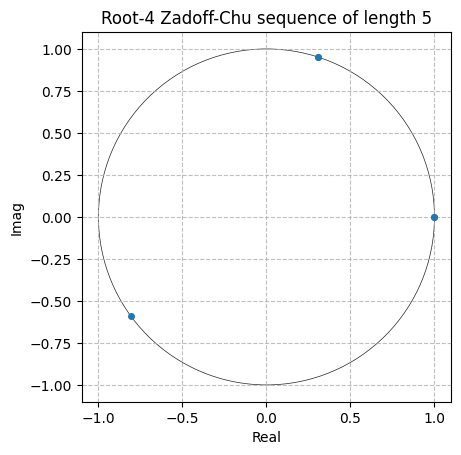

,ZC squence
0,1.0000+0.0000j
1,0.3090+0.9511j
2,-0.8090-0.5878j
3,0.3090+0.9511j
4,1.0000+0.0000j


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sdr

# Init params
# Length of sequence:
N = 5
# Roots of sequences:
r1 = 4

# Generate ZC sequence with root
S1 = sdr.zadoff_chu_sequence(N, r1)

plt.figure()
sdr.plot.constellation(S1, linestyle="", linewidth=0.5, markersize=8)
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.title(f"Root-{r1} Zadoff-Chu sequence of length {N}")
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

# Print sequences
pd.DataFrame({
    'ZC squence':  np.round(S1, decimals=4),
})

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sdr

# Length of sequence:
N = 11
# Length of ZC-extend:
N_sf = 12
# Roots of sequences:
r1 = 4

# Number of plots in 1 row
NUM_COLS = 5
dataframes = {}
plt.figure(figsize=(15, 10))

# Diapason for ZC 
diapason = np.arange(N)

# Diapason for ZC extend
# diapason = np.arange(N_sf)

# set values of shifts for plot ZC sequence
# diapason = [0, 1, 2, 3, 4, 5, 6, 7]

for i, shift in enumerate(diapason):

    # Generate ZC sequence with root
    S1 = sdr.zadoff_chu_sequence(N, r1, shift=int(shift))
    
    # Generate S1, S2 - Extend of ZC sequence
    # For ZC sequence set this:
    SEQUENCE_1 = S1

    # For ZC sequence extend uncomment this:
    Z1 = np.zeros(N_sf)
    Z1 = S1[np.arange(N_sf) % N]
    SEQUENCE_1 = Z1
    
    SEQUENCE_1 = np.roll(SEQUENCE_1, int(shift))
    dataframes[f'shift={int(shift)}'] = np.round(SEQUENCE_1, decimals=4)
    
    # Determine subplot position
    plt.subplot(len(diapason) // NUM_COLS + (len(diapason) % NUM_COLS > 0), NUM_COLS, i + 1)
    sdr.plot.constellation(SEQUENCE_1, linestyle="-", linewidth=0.5, markersize=8)
    circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
    plt.gca().add_artist(circle)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.title(f"Root-{r1} ZC of length {N}, shift={int(shift)}")

plt.subplots_adjust(hspace=0.01)
plt.tight_layout()
plt.show()

pd.DataFrame(dataframes)

NameError: name 'zc_sequence' is not defined

<Figure size 1500x1000 with 0 Axes>

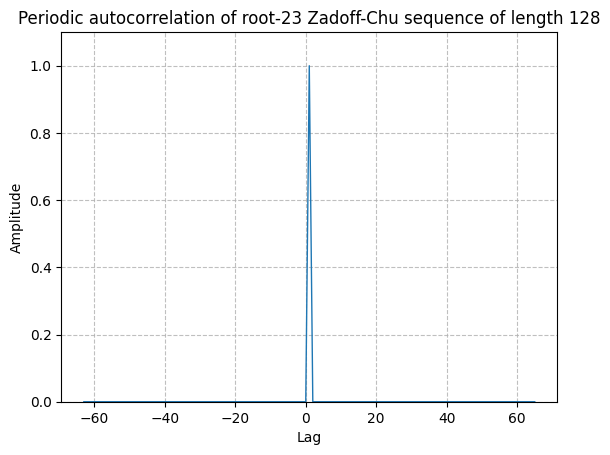

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sdr

# Periodic autocorrelation
# Length of sequence:
N = 128
# Length of ZC-extend:
N_sf = 64
# Roots of sequences:
r1 = 23

# Generate ZC sequence
S1 = sdr.zadoff_chu_sequence(N, r1)
SEQUENCE_1 = S1

# For ZC sequence extend uncomment this:
# Z1 = np.zeros(N_sf)
# 
# SEQUENCE_1 = Z1

L = len(SEQUENCE_1)
# Perform periodic auto correlation
corr = np.correlate(np.roll(np.tile(SEQUENCE_1, 2), -L//2), SEQUENCE_1, mode="valid")
lag = np.arange(-L//2 + 1, L//2 + 2)

plt.figure()
sdr.plot.time_domain(lag, np.abs(corr) / L)
plt.ylim(0, 1.1)
plt.xlabel("Lag")
plt.title(f'Periodic autocorrelation of root-{r1} Zadoff-Chu sequence of length {L}')
plt.show()

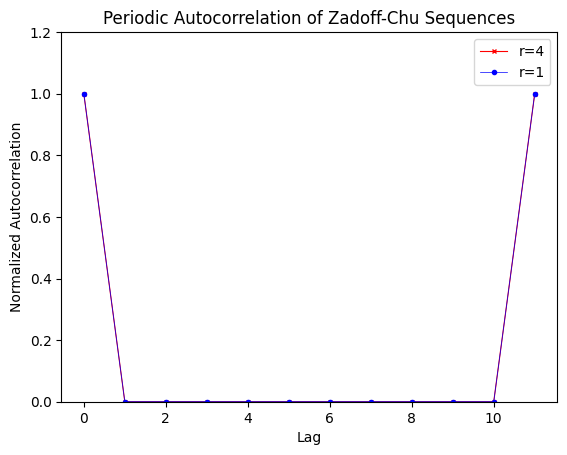

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import sdr

# Autocorrelation for Periodic ZC (and extend)
# Length of sequence:
N = 11
# Length of ZC-extend:
N_sf = 12
# Roots of sequences:
r1 = 1
r2 = 4

# Using ZC sequence
# Generate ZC1, ZC2 - ZC sequence
S1 = sdr.zadoff_chu_sequence(N, r1)
S2 = sdr.zadoff_chu_sequence(N, r2)
SEQUENCE_1 = S1
SEQUENCE_2 = S2
L = N

# Generate S1, S2 - Extend of ZC sequence
# For using uncomments this code:
# Z1 = np.zeros(N_sf)
# Z2 = np.zeros(N_sf)
# Z1 = S1[np.arange(N_sf) % N]
# Z2 = S2[np.arange(N_sf) % N]
# SEQUENCE_1 = Z1
# SEQUENCE_2 = Z2
# L = N_sf

# Perform periodic auto correlation
lag = np.arange(L+1)
corr1 = np.correlate(np.roll(np.tile(SEQUENCE_1, 2), 0), SEQUENCE_1)
corr2 = np.correlate(np.roll(np.tile(SEQUENCE_2, 2), 0), SEQUENCE_2)

plt.figure()
plt.plot(lag, np.abs(corr2) / L, label=f'r={r2}', color='r', linewidth=0.8, marker='x', markersize=3)
plt.plot(lag, np.abs(corr1) / L, label=f'r={r1}', color='b', linewidth=0.5, marker='o', markersize=3)
plt.ylim(0, 1.2)
plt.xlabel("Lag")
plt.ylabel("Normalized Autocorrelation")
plt.title("Periodic Autocorrelation of Zadoff-Chu Sequences")
plt.legend(loc='upper right')
plt.show()

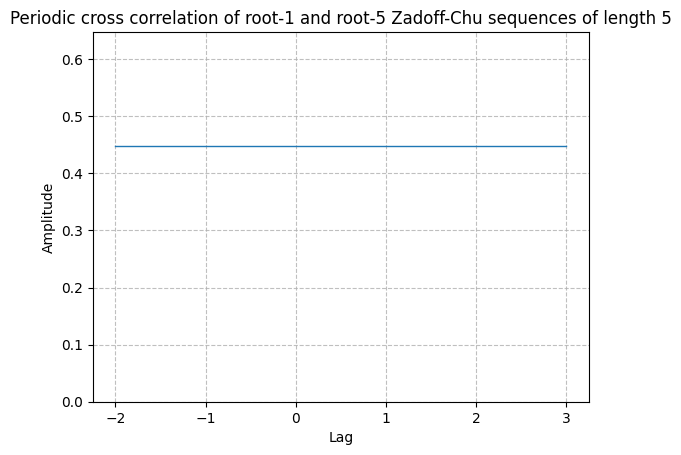

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sdr

# Periodic cross correlation of ZC1 with ZC2
# Length of sequence:
N = 5
# Length of ZC-extend:
N_sf = 12
# Roots of sequences:
r1 = 1
r2 = 4

# Generate ZC sequence
S1 = sdr.zadoff_chu_sequence(N, r1)
S2 = sdr.zadoff_chu_sequence(N, r2)
SEQUENCE_1 = S1
SEQUENCE_2 = S2

# For ZC sequence extend uncomment this:
# Z1 = np.zeros(N_sf)
# Z2 = np.zeros(N_sf)
# Z1 = S1[np.arange(N_sf) % N]
# Z2 = S2[np.arange(N_sf) % N]
# SEQUENCE_1 = Z1
# SEQUENCE_2 = Z2

L = len(SEQUENCE_1)
xcorr = np.correlate(np.roll(np.tile(SEQUENCE_1, 2), -L//2), SEQUENCE_2, mode="valid")
lag = np.arange(-L//2 + 1, L//2 + 2)

plt.figure()
sdr.plot.time_domain(lag, np.abs(xcorr) / L)
plt.ylim(0, np.max(np.abs(xcorr) / L) + 0.2)
plt.xlabel("Lag")
plt.title(f"Periodic cross correlation of root-{r1} and root-5 Zadoff-Chu sequences of length {L}")
plt.show()

Text(0.5, 1.0, 'FFT transform of ZC  length: 12, root: 4')

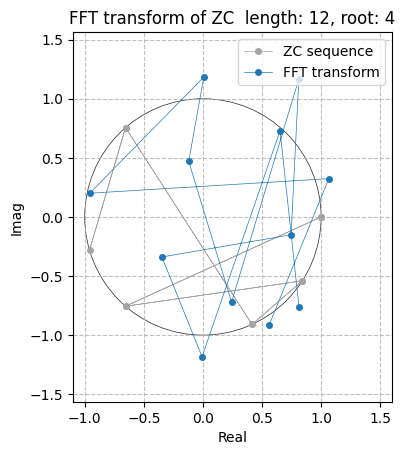

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sdr

# Apply fft to ZC squence
# Params: N - length, r1 - root index of ZC sequence
N = 11
N_sf = 12
r1 = 4

# Generate ZC
S1 = sdr.zadoff_chu_sequence(N, r1)
SEQUENCE_1 = S1

# For ZC sequence extend uncomment this:
Z1 = np.zeros(N_sf)
Z1 = S1[np.arange(N_sf) % N]
SEQUENCE_1 = Z1

L = len(SEQUENCE_1)
# Appling FFT to ZC sequence 
FFT_ZC = np.fft.fft(SEQUENCE_1 / np.sqrt(L))

plt.figure()
sdr.plot.constellation(SEQUENCE_1, color='#a5a5a5', linestyle="-", linewidth=0.5, markersize=8, label='ZC sequence')
sdr.plot.constellation(FFT_ZC, linestyle="-", linewidth=0.5, markersize=8, label='FFT transform')
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.xlim(-1.1, 1.6)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.legend(loc='upper right')
plt.title(f"FFT transform of ZC  length: {L}, root: {r1}")